## Preprocessing
Import data

In [1]:
from os.path import getsize
from urllib.request import urlretrieve

# you will need to create the "large" folder if it does not exist
# you can also change this to change where you want the data to be downloaded
output_dir = "../raw_data"

# template for the type of taxi / year you wish to download
fname_template = "yellow_tripdata_2018"

# change range(x, y) to be the months you want
for m in range(1, 7):
    month = str(m).zfill(2)
    out = f'{fname_template}-{month}.csv'
    url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/{out}"
    urlretrieve(url, f"{output_dir}/{out}")

    print(f"Done downloading {out} to {output_dir} with size {getsize(f'{output_dir}/{out}') / 1073741824:.2f}GB")

Done downloading yellow_tripdata_2018-01.csv to ../raw_data with size 0.72GB
Done downloading yellow_tripdata_2018-02.csv to ../raw_data with size 0.70GB
Done downloading yellow_tripdata_2018-03.csv to ../raw_data with size 0.77GB
Done downloading yellow_tripdata_2018-04.csv to ../raw_data with size 0.76GB
Done downloading yellow_tripdata_2018-05.csv to ../raw_data with size 0.76GB
Done downloading yellow_tripdata_2018-06.csv to ../raw_data with size 0.72GB


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [31]:
# concat the files
import glob

path = r'../raw_data/taxi_data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

yellow_18 = pd.concat(li, axis=0, ignore_index=True)
yellow_18

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-05-01 00:13:56,2018-05-01 00:22:46,1,1.60,1,N,230,50,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
1,1,2018-05-01 00:23:26,2018-05-01 00:29:56,1,1.70,1,N,263,239,1,7.5,0.5,0.5,2.00,0.0,0.3,10.80
2,1,2018-05-01 00:36:23,2018-05-01 00:48:26,2,2.60,1,N,239,152,1,12.0,0.5,0.5,1.00,0.0,0.3,14.30
3,1,2018-05-01 00:26:12,2018-05-01 00:27:05,1,0.00,1,N,145,145,1,2.5,0.5,0.5,9.63,0.0,0.3,13.43
4,1,2018-05-01 00:29:51,2018-05-01 00:30:02,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925730,2,2018-03-31 23:34:47,2018-03-31 23:55:17,5,4.11,1,N,186,263,1,17.0,0.5,0.5,1.00,0.0,0.3,19.30
53925731,2,2018-03-31 23:02:38,2018-03-31 23:13:10,6,1.50,1,N,100,107,1,8.5,0.5,0.5,1.47,0.0,0.3,11.27
53925732,2,2018-03-31 23:15:58,2018-03-31 23:30:29,6,2.07,1,N,107,170,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
53925733,1,2018-03-31 23:05:37,2018-03-31 23:18:31,2,1.60,1,N,163,164,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30


In [32]:
yellow_18.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [53]:
# clean the data
cleaned_yellow_18 = yellow_18[yellow_18["passenger_count"] != 0]
cleaned_yellow_18 = cleaned_yellow_18[cleaned_yellow_18["trip_distance"] != 0]
cleaned_yellow_18 = cleaned_yellow_18[(cleaned_yellow_18['tpep_pickup_datetime']<='2018-06-30 23:59:59') & (cleaned_yellow_18['tpep_pickup_datetime']>='2018-01-01 00:00:00')]
cleaned_yellow_18 = cleaned_yellow_18[(cleaned_yellow_18['tpep_dropoff_datetime']<='2018-06-30 23:59:59') & (cleaned_yellow_18['tpep_dropoff_datetime']>='2018-01-01 00:00:00')]
# only need the data with known tip amount
cleaned_yellow_18 = cleaned_yellow_18[cleaned_yellow_18["payment_type"] == 1]
cleaned_yellow_18 = cleaned_yellow_18[cleaned_yellow_18["fare_amount"] >= 2.5]
cleaned_yellow_18 = cleaned_yellow_18[cleaned_yellow_18["tolls_amount"] >= 2.5]
cleaned_yellow_18

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12,1,2018-05-01 00:20:02,2018-05-01 00:56:06,1,18.10,2,N,142,132,1,52.0,0.0,0.5,14.60,5.76,0.3,73.16
76,1,2018-05-01 00:51:09,2018-05-01 01:07:11,1,8.60,1,N,162,95,1,25.5,0.5,0.5,6.50,5.76,0.3,39.06
150,2,2018-05-01 00:42:23,2018-05-01 01:05:28,1,17.77,2,N,132,162,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27
167,2,2018-05-01 00:10:29,2018-05-01 00:35:31,1,11.90,1,N,162,220,1,34.5,0.5,0.5,15.38,2.64,0.3,53.82
176,1,2018-05-01 00:31:26,2018-05-01 01:01:43,1,19.50,2,N,132,141,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925336,2,2018-03-31 23:11:27,2018-03-31 23:47:52,1,12.08,1,N,158,17,1,37.5,0.5,0.5,8.00,5.76,0.3,52.56
53925338,2,2018-03-31 23:27:13,2018-03-31 23:42:12,1,3.53,1,N,145,48,1,13.5,0.5,0.5,2.00,5.76,0.3,22.56
53925387,2,2018-03-31 23:24:44,2018-03-31 23:42:20,1,8.96,1,N,138,236,1,26.0,0.5,0.5,6.61,5.76,0.3,39.67
53925582,1,2018-03-31 23:40:26,2018-04-01 00:17:19,1,19.30,2,N,132,24,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56


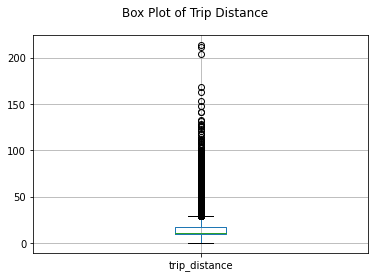

In [54]:
# plot the boxplot of trip distance
distance_boxplot = cleaned_yellow_18.boxplot(column="trip_distance")
fig = distance_boxplot.get_figure()

fig.suptitle('Box Plot of Trip Distance')
fig.show()
fig.savefig('distribution of trip distance.png')

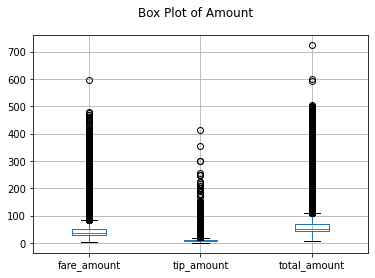

In [55]:
# plot the boxplot of amounts
amount = ["fare_amount", "tip_amount", "total_amount"]
amount_boxplot = cleaned_yellow_18.boxplot(column=amount)

fig = amount_boxplot.get_figure()

fig.suptitle('Box Plot of Amount')
fig.show()
fig.savefig('distribution of amount.png')

In [56]:
# remove outliers of amount
Q1 = cleaned_yellow_18[amount].quantile(0.25)
Q3 = cleaned_yellow_18[amount].quantile(0.75)
IQR = Q3 - Q1
cleaned = cleaned_yellow_18[~((cleaned_yellow_18[amount] < (Q1-3*IQR)) | (cleaned_yellow_18[amount] > (Q3+3*IQR))).any(axis=1)]
cleaned

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12,1,2018-05-01 00:20:02,2018-05-01 00:56:06,1,18.10,2,N,142,132,1,52.0,0.0,0.5,14.60,5.76,0.3,73.16
76,1,2018-05-01 00:51:09,2018-05-01 01:07:11,1,8.60,1,N,162,95,1,25.5,0.5,0.5,6.50,5.76,0.3,39.06
150,2,2018-05-01 00:42:23,2018-05-01 01:05:28,1,17.77,2,N,132,162,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27
167,2,2018-05-01 00:10:29,2018-05-01 00:35:31,1,11.90,1,N,162,220,1,34.5,0.5,0.5,15.38,2.64,0.3,53.82
176,1,2018-05-01 00:31:26,2018-05-01 01:01:43,1,19.50,2,N,132,141,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925336,2,2018-03-31 23:11:27,2018-03-31 23:47:52,1,12.08,1,N,158,17,1,37.5,0.5,0.5,8.00,5.76,0.3,52.56
53925338,2,2018-03-31 23:27:13,2018-03-31 23:42:12,1,3.53,1,N,145,48,1,13.5,0.5,0.5,2.00,5.76,0.3,22.56
53925387,2,2018-03-31 23:24:44,2018-03-31 23:42:20,1,8.96,1,N,138,236,1,26.0,0.5,0.5,6.61,5.76,0.3,39.67
53925582,1,2018-03-31 23:40:26,2018-04-01 00:17:19,1,19.30,2,N,132,24,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56


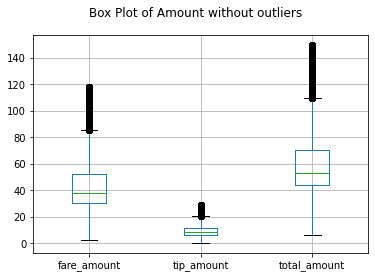

In [57]:
# re-plot the boxplot of amount with outliers removed
amount_boxplot = cleaned.boxplot(column=amount)
fig = amount_boxplot.get_figure()

fig.suptitle('Box Plot of Amount without outliers')
fig.show()
fig.savefig('distribution of amount(without outliers).png')

In [58]:
cleaned.reset_index().to_feather('cleaned_yellow_18.csv')